In [2]:
#By usnig the Ml cycle:
#Defined the problem and the object(Goal) through [MLAcademy] Project1 file ---(done))
#The data was already collected ---(done)

#Data Exploration Step: 1-import the Data 2-apply Basic statistics   3-read the Readme file 


In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [37]:
#import the Train data 

import pandas as pd #To work with data through Dataframes 

df_client = pd.read_csv("/content/client_train.csv")
df_invoice = pd.read_csv("/content/invoice_train.csv")
df_client_test = pd.read_csv("/content/client_test.csv")
df_invoice_test =  pd.read_csv("/content/invoice_test.csv")
sam_sub=pd.read_csv("/SampleSubmission.csv")

In [7]:
print(df_client.head())

   disrict          client_id  client_catg  region creation_date  target
0       60     train_Client_0           11     101    31/12/1994     0.0
1       69     train_Client_1           11     107    29/05/2002     0.0
2       62    train_Client_10           11     301    13/03/1986     0.0
3       69   train_Client_100           11     105    11/07/1996     0.0
4       62  train_Client_1000           11     303    14/10/2014     0.0


In [8]:
print(df_client.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB
None


In [9]:
print(df_client.describe())

             disrict    client_catg         region         target
count  135493.000000  135493.000000  135493.000000  135493.000000
mean       63.511222      11.512506     206.159809       0.055841
std         3.354400       4.423761     104.207044       0.229614
min        60.000000      11.000000     101.000000       0.000000
25%        62.000000      11.000000     103.000000       0.000000
50%        62.000000      11.000000     107.000000       0.000000
75%        69.000000      11.000000     307.000000       0.000000
max        69.000000      51.000000     399.000000       1.000000


In [10]:
print(df_invoice.head())

        client_id invoice_date  tarif_type  counter_number  counter_statue  \
0  train_Client_0   2014-03-24        11.0       1335667.0             0.0   
1  train_Client_0   2013-03-29        11.0       1335667.0             0.0   
2  train_Client_0   2015-03-23        11.0       1335667.0             0.0   
3  train_Client_0   2015-07-13        11.0       1335667.0             0.0   
4  train_Client_0   2016-11-17        11.0       1335667.0             0.0   

   counter_code  reading_remarque  counter_coefficient  consommation_level_1  \
0         203.0               8.0                  1.0                  82.0   
1         203.0               6.0                  1.0                1200.0   
2         203.0               8.0                  1.0                 123.0   
3         207.0               8.0                  1.0                 102.0   
4         207.0               9.0                  1.0                 572.0   

   consommation_level_2  consommation_level_3  con

In [11]:
print(df_invoice.info(show_counts= True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337914 entries, 0 to 337913
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             337914 non-null  object 
 1   invoice_date          337913 non-null  object 
 2   tarif_type            337913 non-null  float64
 3   counter_number        337913 non-null  float64
 4   counter_statue        337913 non-null  float64
 5   counter_code          337913 non-null  float64
 6   reading_remarque      337913 non-null  float64
 7   counter_coefficient   337913 non-null  float64
 8   consommation_level_1  337913 non-null  float64
 9   consommation_level_2  337913 non-null  float64
 10  consommation_level_3  337913 non-null  float64
 11  consommation_level_4  337913 non-null  float64
 12  old_index             337913 non-null  float64
 13  new_index             337913 non-null  float64
 14  months_number         337913 non-null  float64
 15  

In [12]:
print(df_invoice.describe())

          tarif_type  counter_number  counter_statue   counter_code  \
count  337913.000000    3.379130e+05   337913.000000  337913.000000   
mean       20.145120    1.109861e+11        0.041203     171.533791   
std        13.471158    1.567999e+12        0.370604     133.023474   
min         8.000000    0.000000e+00        0.000000       5.000000   
25%        11.000000    1.223370e+05        0.000000       5.000000   
50%        11.000000    4.947620e+05        0.000000     203.000000   
75%        40.000000    1.137075e+06        0.000000     207.000000   
max        45.000000    2.738110e+13        5.000000     600.000000   

       reading_remarque  counter_coefficient  consommation_level_1  \
count     337913.000000        337913.000000         337913.000000   
mean           7.311409             1.000024            403.490203   
std            1.359869             0.016138            575.599866   
min            6.000000             0.000000              0.000000   
25%       

In [13]:
#After analyzing the data ,found that: 
  #client data has (client_id - creation_date) are Objects
  #client data has the dependent value (target)
  #invoice data has (client_id - invoice_date - counter_statue - counter_type) are Objects

#Merge the data in one dataframe (df)
df = pd.merge(df_client,df_invoice , on="client_id")
df_test = pd.merge(df_client_test,df_invoice_test , on="client_id")
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337914 entries, 0 to 337913
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disrict               337914 non-null  int64  
 1   client_id             337914 non-null  object 
 2   client_catg           337914 non-null  int64  
 3   region                337914 non-null  int64  
 4   creation_date         337914 non-null  object 
 5   target                337914 non-null  float64
 6   invoice_date          337913 non-null  object 
 7   tarif_type            337913 non-null  float64
 8   counter_number        337913 non-null  float64
 9   counter_statue        337913 non-null  float64
 10  counter_code          337913 non-null  float64
 11  reading_remarque      337913 non-null  float64
 12  counter_coefficient   337913 non-null  float64
 13  consommation_level_1  337913 non-null  float64
 14  consommation_level_2  337913 non-null  float64
 15  

In [14]:
# Decide which categorical variables you want to use in model
for col_name in df_client.columns:
    if df_client[col_name].dtypes == 'object':
        unique_cat = len(df_client[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'client_id' has 135493 unique categories
Feature 'creation_date' has 8088 unique categories


In [15]:
# Decide which categorical variables you want to use in model
for col_name in df_invoice.columns:
    if df_invoice[col_name].dtypes == 'object':
        unique_cat = len(df_invoice[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'client_id' has 10109 unique categories
Feature 'invoice_date' has 4447 unique categories
Feature 'counter_type' has 3 unique categories


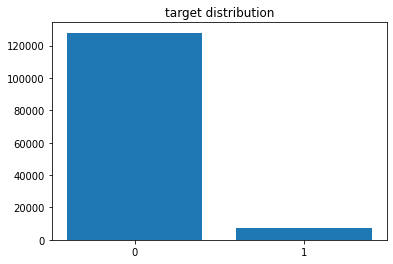

In [16]:
ds = df_client.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

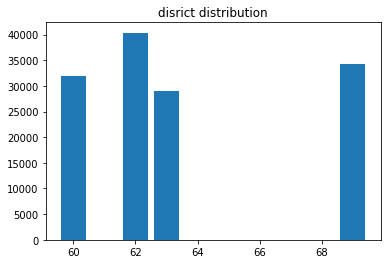

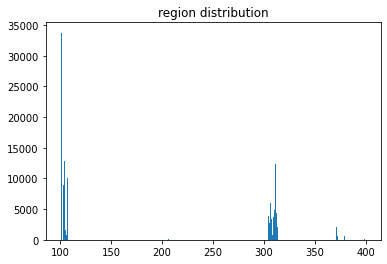

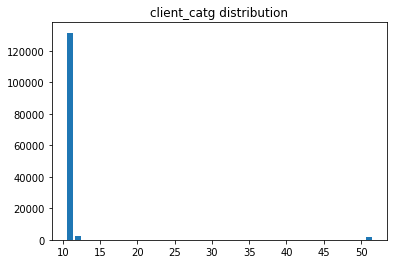

In [17]:
for col in ['disrict','region','client_catg']:
    ds = df_client.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

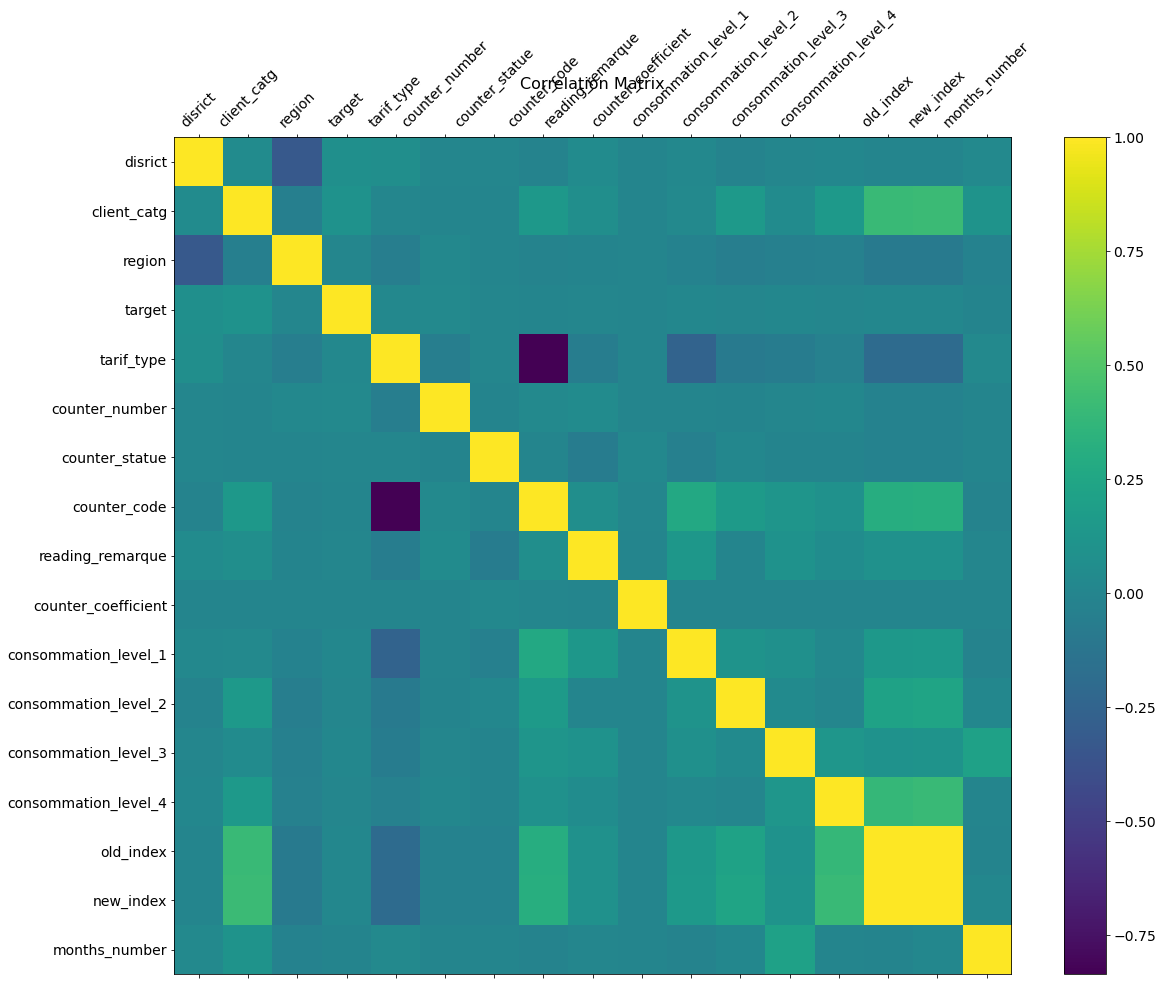

In [18]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [19]:
#No missing values.So, prepare the dtype.

#client_id
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["client_id"] = ord_enc.fit_transform(df[["client_id"]])
df_test["client_id"] = ord_enc.fit_transform(df_test[["client_id"]])

In [20]:
#counter_type
O_E_M_T={'ELEC':0,"GAZ":1}
df['counter_type']=df["counter_type"].replace(O_E_M_T)
df_test['counter_type']=df_test["counter_type"].replace(O_E_M_T)
pd.to_numeric(df['counter_type'])
pd.to_numeric(df_test['counter_type'])

print(df['counter_type'].value_counts())

0.0    232199
1.0    105714
Name: counter_type, dtype: int64


In [21]:
#counter_statue
O_E_M_S={'A':6,'0':0,'1':1,'5':5,'4':4}
df['counter_statue']=df["counter_statue"].replace(O_E_M_S)
df_test['counter_statue']=df_test["counter_statue"].replace(O_E_M_S)

print(df['counter_statue'].value_counts())

0.0    330735
1.0      5431
5.0      1532
4.0       192
3.0        18
2.0         5
Name: counter_statue, dtype: int64


In [22]:
#invoice_date
df['invoice_date']=pd.to_datetime(df['invoice_date'])
df['day'] = df['invoice_date'].dt.day
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df['invoice_date']=df['day']+df['month']*100+df['year']*10000
df=df.drop(['day','month','year'],axis=1)

df_test['invoice_date']=pd.to_datetime(df_test['invoice_date'])
df_test['day'] = df_test['invoice_date'].dt.day
df_test['month'] = df_test['invoice_date'].dt.month
df_test['year'] = df_test['invoice_date'].dt.year
df_test['invoice_date']=df_test['day']+df_test['month']*100+df_test['year']*10000
df_test=df_test.drop(['day','month','year'],axis=1)

In [23]:
#creation_date
df['creation_date']=pd.to_datetime(df['creation_date'])
df['day'] = df['creation_date'].dt.day
df['month'] = df['creation_date'].dt.month
df['year'] = df['creation_date'].dt.year
df['creation_date']=df['day']+df['month']*100+df['year']*10000
df=df.drop(['day','month','year'],axis=1)


df_test['creation_date']=pd.to_datetime(df_test['creation_date'])
df_test['day'] = df_test['creation_date'].dt.day
df_test['month'] = df_test['creation_date'].dt.month
df_test['year'] = df_test['creation_date'].dt.year
df_test['creation_date']=df_test['day']+df_test['month']*100+df_test['year']*10000
df_test=df_test.drop(['day','month','year'],axis=1)

In [24]:
print(df['invoice_date'])

0         20140324.0
1         20130329.0
2         20150323.0
3         20150713.0
4         20161117.0
             ...    
337909    20080412.0
337910    20110804.0
337911    20070808.0
337912    20120612.0
337913    20130304.0
Name: invoice_date, Length: 337914, dtype: float64



So, We will do second phase (modeling phase).

**First**, We can say that we use Supervised Learning.
Algorithms & Regression and Gradient Boosting algorithms.
    
    Supervised:Label data.    
    Regration : Represent data as aline.

**Second**, Our problem is building a model that will help *classify* **which customer**  is likely to commit *fraud* and by
that ***saving the company from making losses***.

Third, We need to define Tasks To


1.   List item
2.   List item





In [25]:
# Decide which categorical variables you want to use in model
for col_name in df_client.columns:
    if df_client[col_name].dtypes == 'object':
        unique_cat = len(df_client[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'client_id' has 135493 unique categories
Feature 'creation_date' has 8088 unique categories


In [26]:
# Decide which categorical variables you want to use in model
for col_name in df_invoice.columns:
    if df_invoice[col_name].dtypes == 'object':
        unique_cat = len(df_invoice[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'client_id' has 10109 unique categories
Feature 'invoice_date' has 4447 unique categories
Feature 'counter_type' has 3 unique categories


Modelling by LightGBM

In [27]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',num_iteration=500, silent=True)

# Separating the independent and target variable on both data set
x_train = df.drop(columns =['target'], axis = 1)
y_train = df['target']
x_test = df_test

#Fit to training data
%time model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 35 s, sys: 185 ms, total: 35.2 s
Wall time: 19.7 s


LGBMClassifier(num_iteration=500)

In [28]:
preds = model.predict_proba(x_test)

In [29]:
preds = pd.DataFrame(preds)

In [30]:
preds.head()

,0,1
0,0.996962,0.003038
1,0.996047,0.003953
2,0.995659,0.004341
3,0.996405,0.003595
4,0.996669,0.003331


Making submission

In [38]:
submission = pd.DataFrame({
        "client_id": sam_sub["client_id"],
        "target": preds[0]
    })
submission.to_csv('sam_sub_0.csv', index=False)

In [39]:
submission.head()

,client_id,target
0,test_Client_0,0.996962
1,test_Client_1,0.996047
2,test_Client_10,0.995659
3,test_Client_100,0.996405
4,test_Client_1000,0.996669


In [40]:
submission = pd.DataFrame({
        "client_id": sam_sub["client_id"],
        "target": preds[1]
    })
submission.to_csv('sam_sub_1.csv', index=False)

In [41]:
submission.head()

,client_id,target
0,test_Client_0,0.003038
1,test_Client_1,0.003953
2,test_Client_10,0.004341
3,test_Client_100,0.003595
4,test_Client_1000,0.003331
